<a href="https://colab.research.google.com/github/Rahul-Malayil/PreprocessML/blob/main/breastcancerprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                                            BREAST CANCER DETECTION

1.Load the breast cancer dataset from sklearn.
2.Preprocess the data to handle any missing values and perform necessary feature scaling.
3.Explain the preprocessing steps you performed and justify why they are necessary for this dataset.                                            

Import necessary libraries and its functions

In [25]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix




Import breast cancer dataset from dataset load_breast_cancer

In [26]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()

In [27]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [28]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [29]:
import pandas as pd
import numpy as np  # Import NumPy and give it the alias 'np'
import matplotlib.pyplot as plt
import seaborn as sns
df_cancer = pd.DataFrame(np.c_[cancer['data'], cancer['target']],
                         columns=np.append(cancer['feature_names'], ['target']))

Print dataset breast cancer

In [30]:
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


Checking the dataset info

In [31]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [32]:
df_cancer['target'].value_counts()

,count
target,
1.0,357
0.0,212


In [33]:
df_cancer.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

Checking duplicates

In [34]:
df_cancer.duplicated().sum()

0

Checking the percentage of outliers

In [35]:
df_cancer.isnull().sum()/len(df_cancer)*100

,0
mean radius,0.0
mean texture,0.0
mean perimeter,0.0
mean area,0.0
mean smoothness,0.0
mean compactness,0.0
mean concavity,0.0
mean concave points,0.0
mean symmetry,0.0
mean fractal dimension,0.0


Plot Graphs

<Axes: ylabel='count'>

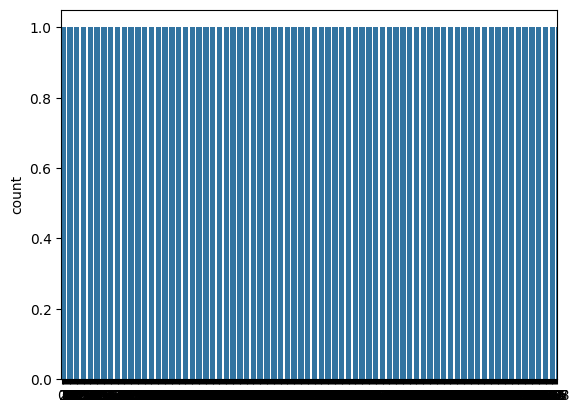

In [36]:
sns.countplot(df_cancer['target'])

Display boxplot to identify outliers

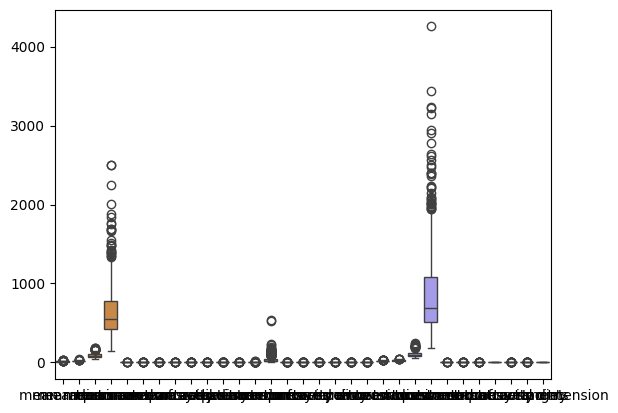

In [37]:
sns.boxplot(df_cancer)
plt.show()

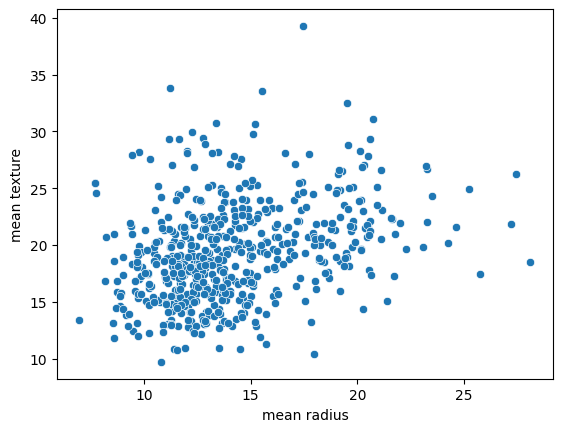

In [38]:
sns.scatterplot(x='mean radius',y='mean texture',data=df_cancer)
plt.show()

In [39]:
nu = df_cancer.select_dtypes(include=['number']).columns
nu

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

Display the skewness

In [40]:
df_cancer[nu].skew()

,0
mean radius,0.942380
mean texture,0.650450
mean perimeter,0.990650
mean area,1.645732
mean smoothness,0.456324
mean compactness,1.190123
mean concavity,1.401180
mean concave points,1.171180
mean symmetry,0.725609
mean fractal dimension,1.304489


Split x and y

In [41]:
x=df_cancer.drop('target',axis=1)
y=df_cancer['target']

Create a function to remove outliers

In [43]:
import pandas as pd

def remove_outliers(df):
    df_filtered = df.copy()  # Create a copy of the DataFrame to avoid modifying the original
    columns = df_filtered.columns # Define columns as a list of columns in the DataFrame
    for column in columns:
        Q1 = df[column].quantile(0.25) # Calculate Q1 for the current column
        Q3 = df[column].quantile(0.75) # Calculate Q3 for the current column
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df_filtered = df_filtered[(df_filtered[column] >= lower_bound) & (df_filtered[column] <= upper_bound)] # Filter based on the current column

    return df_filtered

dff = remove_outliers(x)

In [44]:
dff

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
10,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,0.05697,...,19.19,33.88,123.80,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452
11,15.78,17.89,103.60,781.0,0.09710,0.12920,0.09954,0.06606,0.1842,0.06082,...,20.42,27.28,136.50,1299.0,0.1396,0.5609,0.3965,0.18100,0.3792,0.10480
13,15.85,23.95,103.70,782.7,0.08401,0.10020,0.09938,0.05364,0.1847,0.05338,...,16.84,27.66,112.00,876.5,0.1131,0.1924,0.2322,0.11190,0.2809,0.06287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,12.88,28.92,82.50,514.3,0.08123,0.05824,0.06195,0.02343,0.1566,0.05708,...,13.89,35.74,88.84,595.7,0.1227,0.1620,0.2439,0.06493,0.2372,0.07242
555,10.29,27.61,65.67,321.4,0.09030,0.07658,0.05999,0.02738,0.1593,0.06127,...,10.84,34.91,69.57,357.6,0.1384,0.1710,0.2000,0.09127,0.2226,0.08283
558,14.59,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.03736,0.1454,0.06147,...,15.48,27.27,105.90,733.5,0.1026,0.3171,0.3662,0.11050,0.2258,0.08004
560,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,...,15.30,33.17,100.20,706.7,0.1241,0.2264,0.1326,0.10480,0.2250,0.08321


Skewness of dff

In [45]:
dff.skew()

,0
mean radius,0.725130
mean texture,0.529933
mean perimeter,0.741548
mean area,1.244330
mean smoothness,0.164956
mean compactness,0.760204
mean concavity,1.375196
mean concave points,1.153376
mean symmetry,0.136015
mean fractal dimension,0.497689


To accurate the datas in the dataset by performing log function to remove the remaining outliers

In [49]:
import numpy as np # Import the numpy library and assign it to the alias np

dff1= np.log1p(dff) # Apply the log1p transformation to your DataFrame

Almost cleared data

In [50]:
dff1.skew()

,0
mean radius,0.034610
mean texture,-0.123054
mean perimeter,0.042354
mean area,-0.049004
mean smoothness,0.116003
mean compactness,0.615943
mean concavity,1.147614
mean concave points,1.049950
mean symmetry,0.043888
mean fractal dimension,0.471899


Heatmap

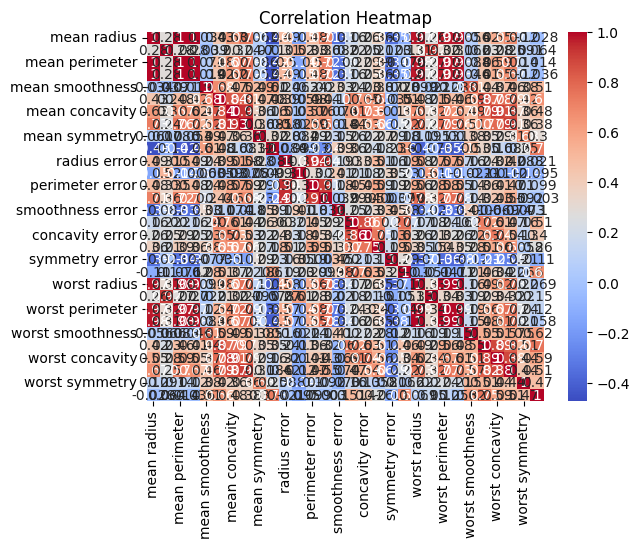

In [52]:
corr=dff1.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [53]:
y

,target
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
564,0.0
565,0.0
566,0.0
567,0.0


In [54]:
y.value_counts()

,count
target,
1.0,357
0.0,212


Standardize X datas

In [61]:
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [62]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=42)

Perform Logistics Regression

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
model = LogisticRegression()
model.fit(x_train, y_train)

# Predict on the test set
y_pred = model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Logistic Regression Model Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)



Logistic Regression Model Accuracy: 0.9825
Confusion Matrix:
[[ 62   1]
 [  2 106]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98        63
         1.0       0.99      0.98      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



Perform SVC,KNN,Randomforest & Gradientboostingclassifier

In [64]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [65]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest Classifier': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting Classifier': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'Support Vector Classifier': SVC(),
    'K-Nearest Neighbors Classifier': KNeighborsClassifier()
}

# Train and evaluate models
results = []
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, output_dict=True)

    # Extract metrics from classification report
    metrics = {
        'Model': name,
        'Accuracy': accuracy,
        'Precision': class_report['weighted avg']['precision'],
        'Recall': class_report['weighted avg']['recall'],
        'F1-Score': class_report['weighted avg']['f1-score']
    }
    results.append(metrics)

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Sort the DataFrame by accuracy in descending order
results_df_sorted = results_df.sort_values(by='Accuracy', ascending=False)

# Print the sorted DataFrame
(results_df_sorted)

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.982456,0.982584,0.982456,0.982484
1,Random Forest Classifier,0.970760,0.971100,0.970760,0.970604
3,Support Vector Classifier,0.970760,0.970925,0.970760,0.970807
2,Gradient Boosting Classifier,0.959064,0.958996,0.959064,0.958995
4,K-Nearest Neighbors Classifier,0.959064,0.958996,0.959064,0.958995


Graph to represent the accuracy

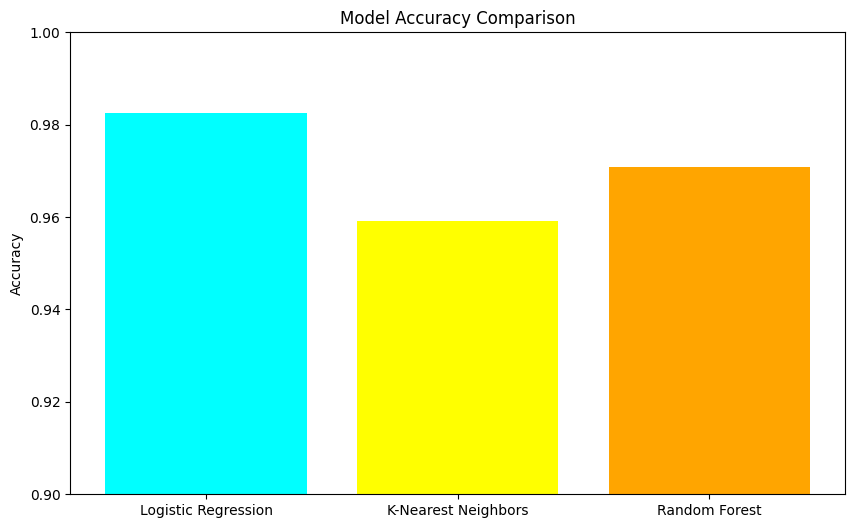

In [67]:
rf_model = models['Random Forest Classifier']
logreg_model = models['Logistic Regression']

y_pred_rf = rf_model.predict(x_test)
y_pred_logreg = logreg_model.predict(x_test)


accuracies = [accuracy_score(y_test, y_pred_logreg), accuracy_score(y_test, y_pred), accuracy_score(y_test, y_pred_rf)]
model_names = ['Logistic Regression', 'K-Nearest Neighbors', 'Random Forest']

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['cyan', 'yellow', 'orange'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim([0.9, 1])
plt.show()